In [10]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [11]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path

epochs = 20

In [12]:
accuracy_list = []

In [13]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.9
learning_rate= 1e-4
wd=1e-4

num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [14]:
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_combined_train_test.csv', classes=['Suicide','Homicide'])


In [15]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)

learn.freeze()

In [16]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


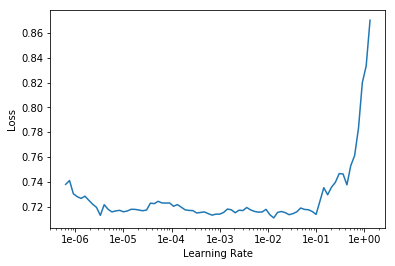

In [17]:
learn.recorder.plot()

In [18]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:28
epoch  train_loss  valid_loss  accuracy
1      0.715153    0.791494    0.314010  (00:07)
2      0.692328    0.785413    0.270531  (00:07)
3      0.671602    0.865804    0.685990  (00:06)
4      0.667743    0.887676    0.685990  (00:06)



In [19]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

epoch,train_loss,valid_loss,accuracy


RuntimeError: CUDA error: out of memory

In [ ]:
learn.validate()

In [ ]:
accuracy_list.append(learn.validate()[1].item())

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)

learn.freeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit(4,learning_rate, wd=wd)

In [ ]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

In [ ]:
learn.validate()

In [ ]:
accuracy_list.append(learn.validate()[1].item())

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)

learn.freeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit(4,learning_rate, wd=wd)

In [ ]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

In [ ]:
learn.validate()

In [ ]:
accuracy_list.append(learn.validate()[1].item())

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)

learn.freeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit(4,learning_rate, wd=wd)

In [ ]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

In [ ]:
learn.validate()

In [ ]:
accuracy_list.append(learn.validate()[1].item())

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)

learn.freeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit(4,learning_rate, wd=wd)

In [ ]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

In [ ]:
learn.validate()

In [ ]:
accuracy_list.append(learn.validate()[1].item())

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
print(accuracy_list)

In [ ]:
print(sum(accuracy_list)/len(accuracy_list))

In [ ]:
import torch

torch.cuda.empty_cache()